In [1]:
import pandas as pd

In [2]:
data_info  = pd.read_csv('https://raw.githubusercontent.com/Ludaxord/TensorflowCourse/master/tensorflow/DATA/lending_club_info.csv' , index_col='LoanStatNew')


In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:

def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:

feat_info('mort_acc')

Number of mortgage accounts.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [436]:
df = pd.read_csv('https://raw.githubusercontent.com/Ludaxord/TensorflowCourse/master/tensorflow/DATA/lending_club_loan_two.csv')

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [438]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


C:\Users\Raman\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

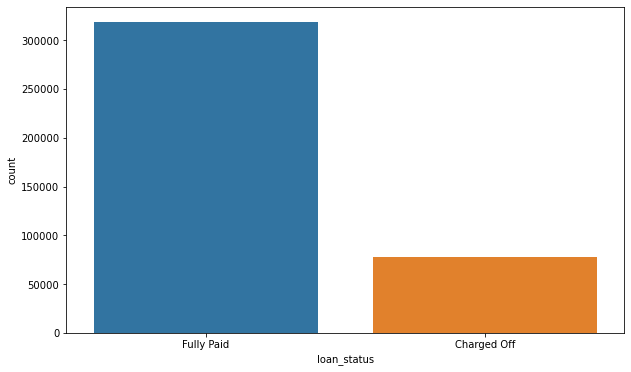

In [439]:
plt.figure(figsize=(10,6))
sns.countplot('loan_status' , data = df)

C:\Users\Raman\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

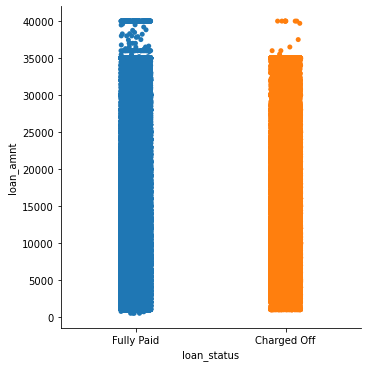

In [440]:
plt.figure(figsize=(10,6))
sns.catplot('loan_status', 'loan_amnt' , data = df)

C:\Users\Raman\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt'>

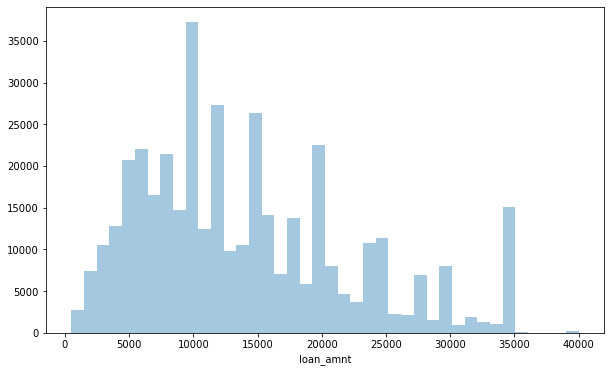

In [441]:
plt.figure(figsize=(10,6))
sns.distplot(df['loan_amnt'] , kde= False , bins = 40 )

<Figure size 720x432 with 0 Axes>

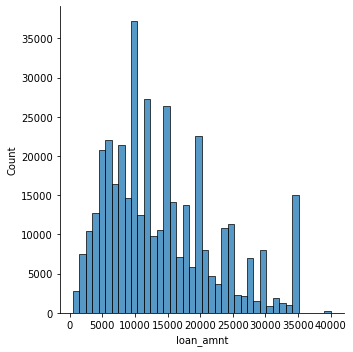

In [442]:
plt.figure(figsize=(10,6))
sns.displot(df['loan_amnt'] , kde= False , bins = 40 , discrete = False)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

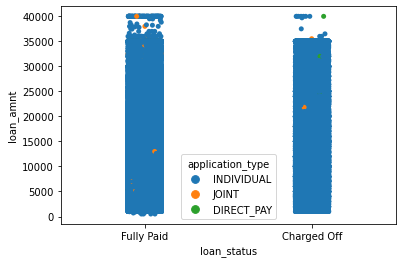

In [443]:
sns.stripplot(x = 'loan_status' , y = 'loan_amnt' , data=df , hue = 'application_type' , jitter = True )

In [444]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

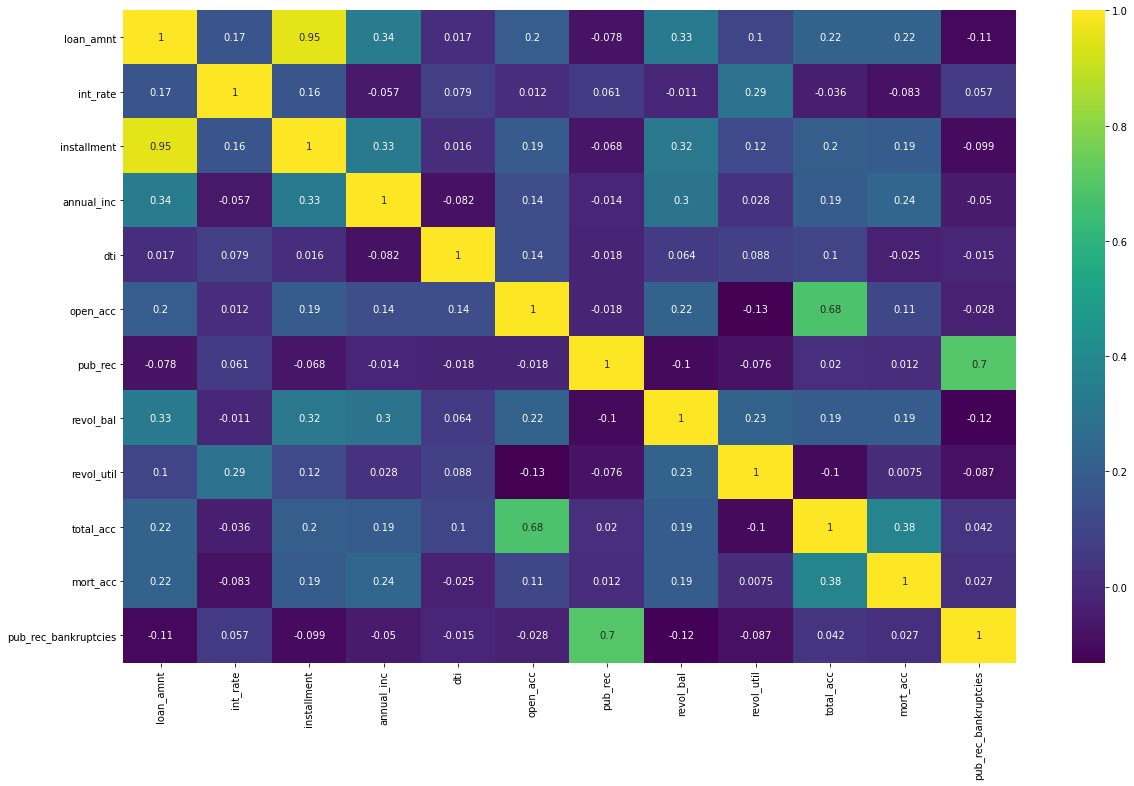

In [445]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr() , annot=True, cmap = 'viridis' )

In [446]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [447]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

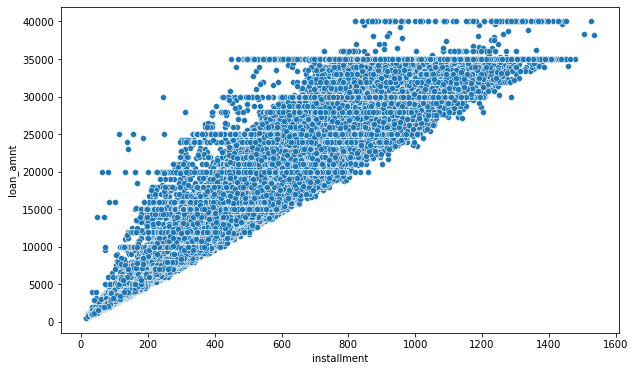

In [448]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'installment' , y = 'loan_amnt', data= df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

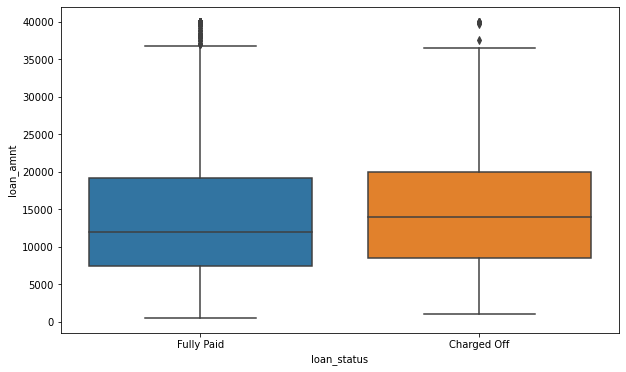

In [449]:
plt.figure(figsize=(10,6))
sns.boxplot(y = 'loan_amnt' , x = 'loan_status' , data = df)

In [450]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [451]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [452]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

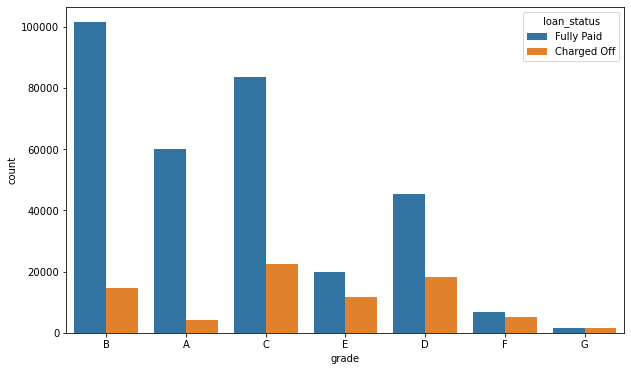

In [453]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['grade'] ,hue= df['loan_status'])

<Figure size 1440x864 with 0 Axes>

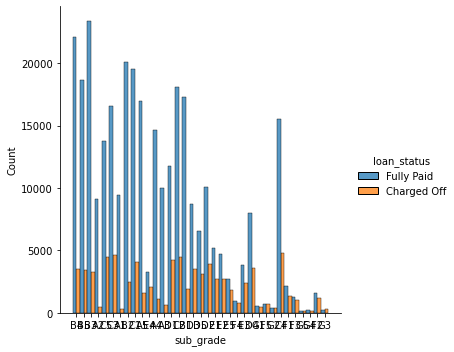

In [454]:
plt.figure(figsize=(20,12))
sns.displot(x = df['sub_grade']  ,hue= df['loan_status']  , multiple = 'dodge' )

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

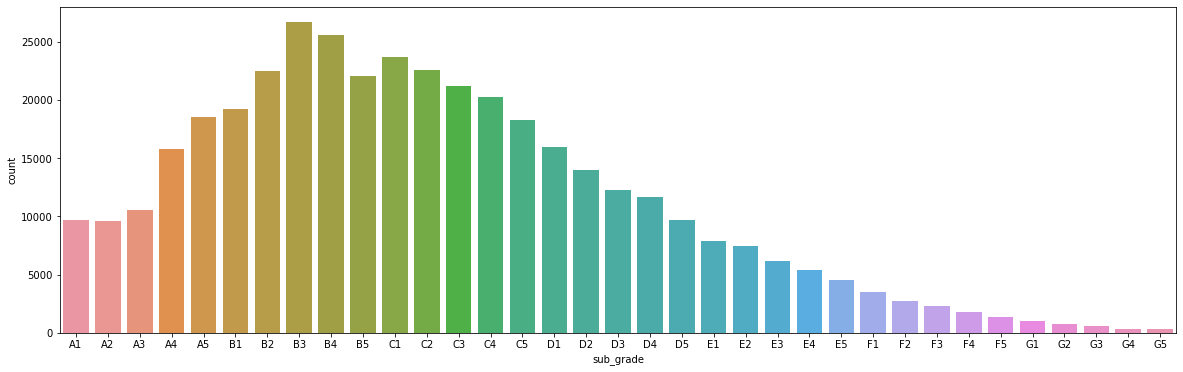

In [455]:
orders = sorted(df['sub_grade'].unique())
plt.figure(figsize=(20,6))
sns.countplot(x = df['sub_grade'] , order=orders)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

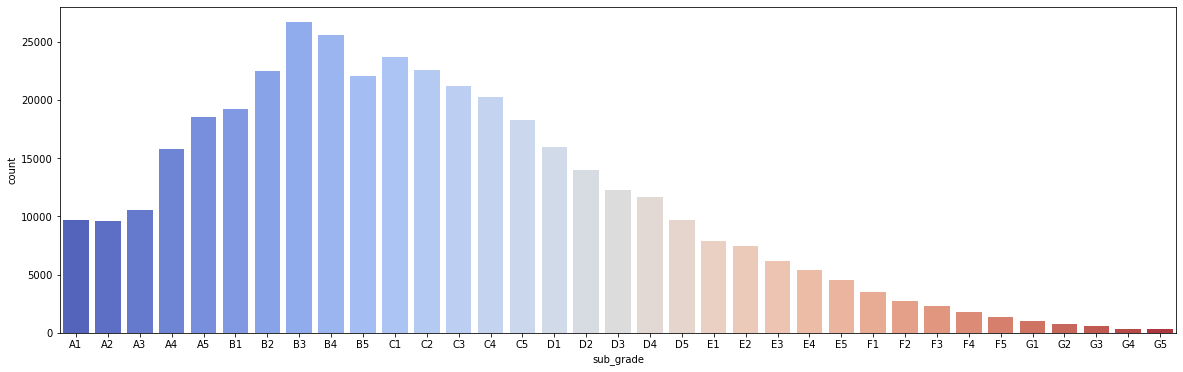

In [456]:
plt.figure(figsize=(20,6))
sns.countplot(x = df['sub_grade'] , order=orders , palette= 'coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

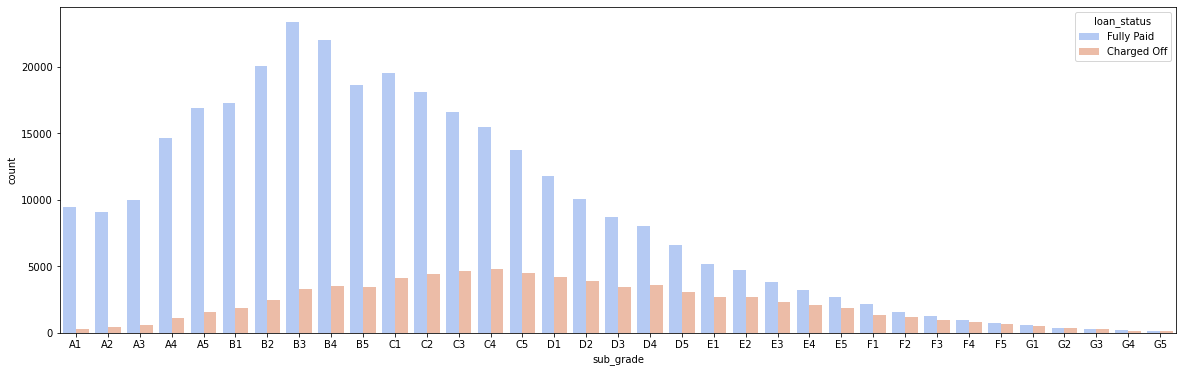

In [457]:
plt.figure(figsize=(20,6))
sns.countplot(x = df['sub_grade'] , order=orders , palette= 'coolwarm' , hue = df['loan_status'])

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

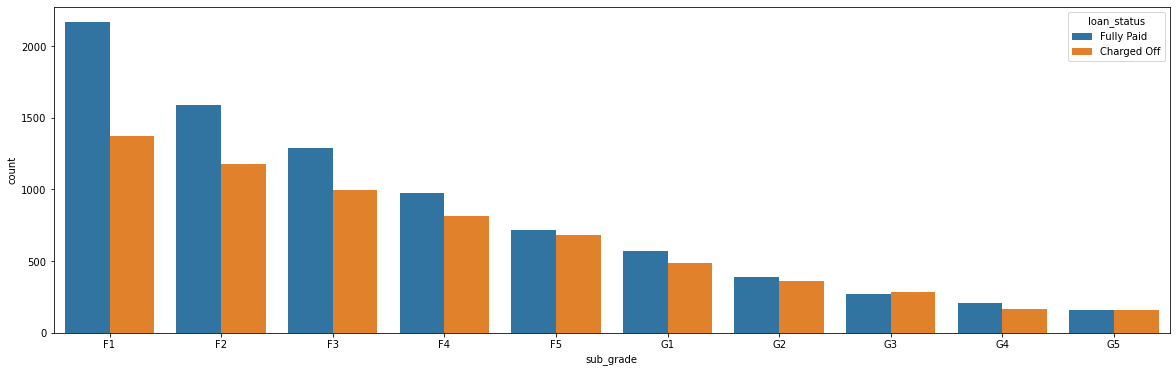

In [458]:
plt.figure(figsize=(20,6))
sns.countplot(x = df['sub_grade'] , order=['F1' , 'F2' , 'F3' , 'F4' , 'F5' , 'G1' ,'G2','G3','G4','G5'] , hue = df['loan_status'])

In [459]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})


In [460]:
df[['loan_repaid' , 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

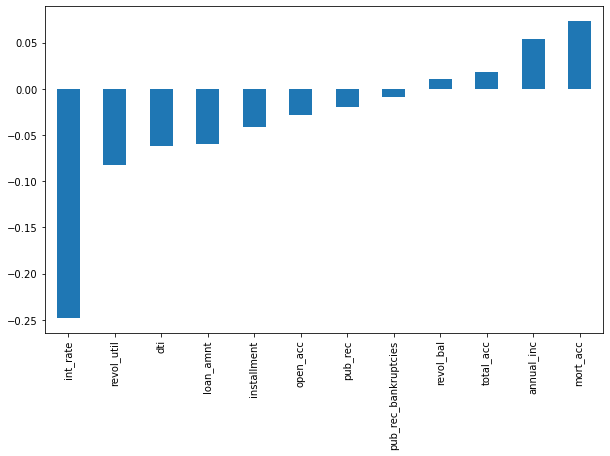

In [461]:
plt.figure(figsize=(10,6))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

In [462]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [463]:
len(df)

396030

In [464]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [466]:
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [467]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [468]:
df['emp_title'].nunique()

173105

In [469]:
df['emp_title'].value_counts()

Teacher                               4389
Manager                               4250
Registered Nurse                      1856
RN                                    1846
Supervisor                            1830
                                      ... 
Sanger Unified                           1
Central ISD                              1
Operations representative                1
Parternships To Uplift Communities       1
Warner Music Group                       1
Name: emp_title, Length: 173105, dtype: int64

In [470]:
df = df.drop('emp_title' ,axis = 1)

In [471]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [472]:
order_emp = [
     '< 1 year',
    '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
             '10+ years',]

C:\Users\Raman\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

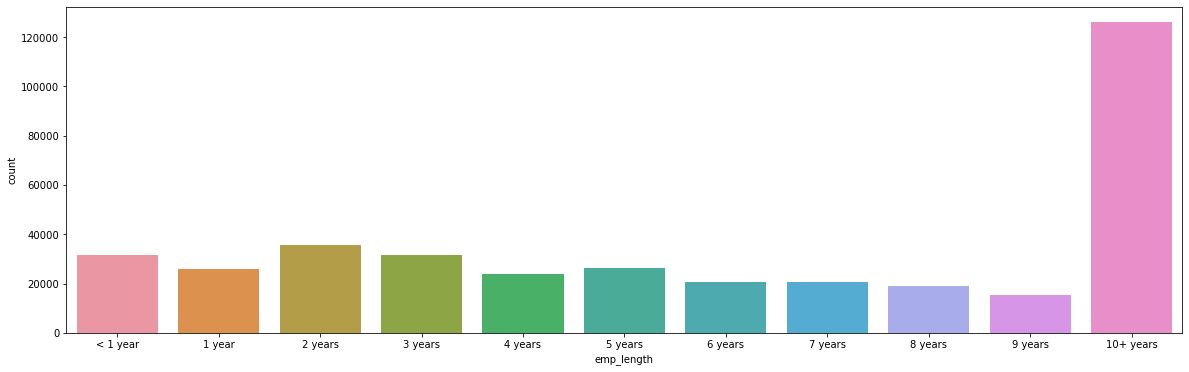

In [473]:
plt.figure(figsize=(20,6))
sns.countplot(df['emp_length'] , order=order_emp)

C:\Users\Raman\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

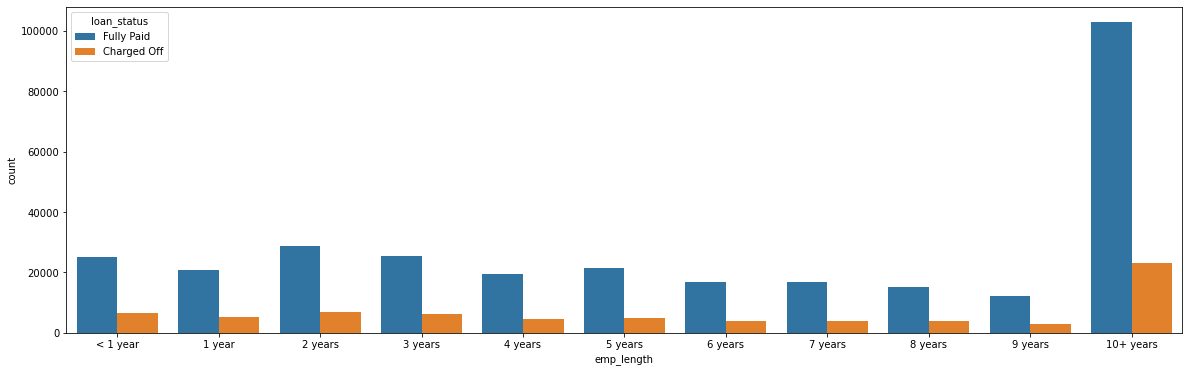

In [474]:
plt.figure(figsize=(20,6))
sns.countplot(df['emp_length'] , order=order_emp,hue=df['loan_status'])

In [475]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [476]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']


In [478]:

emp_len = emp_co/emp_fp

<AxesSubplot:xlabel='emp_length'>

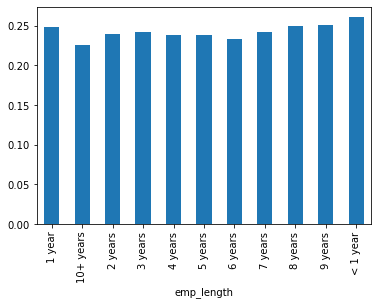

In [479]:
emp_len.plot(kind = 'bar')

In [480]:
df = df.drop('emp_length', axis=1)

In [481]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [482]:
feat_info('title')

The loan title provided by the borrower


In [483]:
df = df.drop('title', axis = 1)

In [484]:
feat_info('mort_acc')

Number of mortgage accounts.


In [485]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [486]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [487]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [488]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [489]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)


In [490]:
df['mort_acc'].isnull().sum()

0

In [491]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [492]:
df = df.dropna()

In [493]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [494]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [495]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))


In [394]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [496]:
df = df.drop('grade',axis=1)


In [498]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)


In [499]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)


In [500]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [501]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [502]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [503]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])


In [504]:

dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [505]:
df = df.drop('issue_d',axis=1)


In [506]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [507]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [509]:
from sklearn.model_selection import train_test_split

In [508]:

df = df.drop('loan_status',axis=1)

In [510]:

X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [511]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [512]:
from sklearn.preprocessing import StandardScaler

In [513]:
scaler = MinMaxScaler()


In [514]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [515]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [516]:

model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [517]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3011 - val_loss: 0.2654
Epoch 2/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2659 - val_loss: 0.2628
Epoch 3/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2634 - val_loss: 0.2625
Epoch 4/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2621 - val_loss: 0.2625
Epoch 5/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2612 - val_loss: 0.2615
Epoch 6/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2608 - val_loss: 0.2621
Epoch 7/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2602 - val_loss: 0.2614
Epoch 8/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2600 - val_loss: 0.2615
Epoch 9/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2599 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.259

In [518]:
from tensorflow.keras.models import load_model


In [519]:

model.save('full_data_project_model.h5')

In [520]:
losses = pd.DataFrame(model.history.history)


<AxesSubplot:>

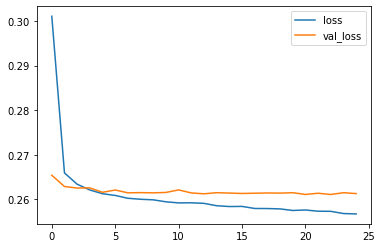

In [521]:
losses[['loss','val_loss']].plot()


In [522]:
from sklearn.metrics import classification_report,confusion_matrix


In [523]:
predictions = model.predict_classes(X_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [524]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [525]:
confusion_matrix(y_test,predictions)


array([[ 6797,  8861],
       [   55, 63331]], dtype=int64)

In [526]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [527]:
model.predict_classes(new_customer.values.reshape(1,78))


array([[1]])

In [528]:
df.iloc[random_ind]['loan_repaid']


1.0